In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##Upload data

In [80]:
from google.colab import files 
uploaded = files.upload()

Saving imputed features_final.csv to imputed features_final (1).csv
Saving Optimal target_초기기준.csv to Optimal target_초기기준 (1).csv
Saving Real_target_full_time.csv to Real_target_full_time.csv
Saving survival.csv to survival (1).csv


In [83]:
import io
feature = pd.read_csv(io.BytesIO(uploaded['imputed features_final.csv'])) 
optimal_target = pd.read_csv(io.BytesIO(uploaded['Optimal target_초기기준.csv'])) 
real_target = pd.read_csv(io.BytesIO(uploaded['Real_target_full_time.csv'])) 
survival = pd.read_csv(io.BytesIO(uploaded['survival.csv'])) 

##Classification (Early / Medium / Late)

In [84]:
optimal_target = optimal_target[['SubjectID', 'time_to_gas', 'status']]
optimal_target.rename(columns = {'time_to_gas' : 'time_opt', 'status':'status_opt' }, inplace = True)
optimal_target

,SubjectID,time_opt,status_opt
0,329,72.0,1
1,348,401.0,0
2,708,35.0,1
3,902,154.0,0
4,1234,11.0,1
...,...,...,...
5133,999166,319.0,1
5134,999482,80.0,1
5135,999823,91.0,1
5136,999880,266.0,0


In [85]:
optimal_real_target = pd.merge(optimal_target, real_target, on = 'SubjectID')
optimal_real_target = optimal_real_target.drop(columns=['Unnamed: 0'] )
optimal_real_target1 = optimal_real_target.copy()
optimal_real_target1 = optimal_real_target1[(optimal_real_target1['status_opt']== 1) & (optimal_real_target1['status_real']==1 )]
optimal_real_target1['real_minus_opt_time'] = optimal_real_target1['time_real'] - optimal_real_target1['time_opt']
optimal_real_target1

,SubjectID,time_opt,status_opt,time_real,status_real,real_minus_opt_time
3,1234,11.0,1,245,1,234.0
19,5936,35.0,1,247,1,212.0
21,6786,272.0,1,272,1,0.0
24,7750,266.0,1,385,1,119.0
30,8150,122.0,1,303,1,181.0
...,...,...,...,...,...,...
4402,988737,182.0,1,364,1,182.0
4412,990774,252.0,1,566,1,314.0
4422,991820,70.0,1,42,1,-28.0
4423,992110,330.0,1,468,1,138.0


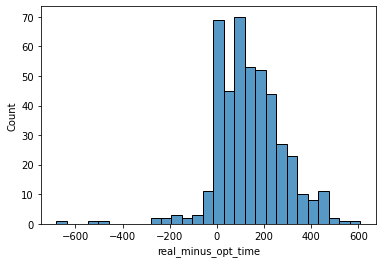

In [86]:
sns.histplot(x=optimal_real_target1['real_minus_opt_time'])

In [87]:
optimal_real_target1.describe()

,SubjectID,time_opt,status_opt,time_real,status_real,real_minus_opt_time
count,442.000000,442.000000,442.0,442.000000,442.0,442.000000
mean,471960.375566,156.904977,1.0,296.730769,1.0,139.825792
std,285878.362632,118.322918,0.0,137.920998,0.0,144.759583
min,1234.000000,7.000000,1.0,2.000000,1.0,-682.000000
25%,220697.250000,66.000000,1.0,199.000000,1.0,56.250000
50%,451163.500000,126.000000,1.0,287.000000,1.0,126.000000
75%,708338.250000,210.000000,1.0,380.000000,1.0,227.000000
max,998894.000000,688.000000,1.0,621.000000,1.0,609.000000


In [88]:
optimal_real_target1['real_minus_opt_time'].value_counts()

0.0      55
63.0     14
28.0      8
119.0     7
126.0     7
         ..
149.0     1
217.0     1
204.0     1
276.0     1
234.0     1
Name: real_minus_opt_time, Length: 235, dtype: int64

In [89]:
subject_early = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] < 0]
subject_medium = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] == 0]
subject_late = optimal_real_target1[optimal_real_target1['real_minus_opt_time'] > 0]
early_list = list(subject_early['SubjectID'])
medium_list = list(subject_medium['SubjectID'])
late_list = list(subject_late['SubjectID'])
print(len(early_list))
print(len(medium_list))
print(len(late_list))

26
55
361


In [90]:
medium_from_early_list = list(subject_early.sort_values('real_minus_opt_time').iloc[-3:]['SubjectID'])
medium_from_late_list = list(subject_late.sort_values('real_minus_opt_time').iloc[:152]['SubjectID'])

In [91]:
optimal_real_target2 = optimal_real_target[(optimal_real_target['status_opt'] == 1) & (optimal_real_target['status_real'] == 0)]
add_late_list = list(optimal_real_target2['SubjectID'])

optimal_real_target3 = optimal_real_target[(optimal_real_target['status_opt'] == 0) & (optimal_real_target['status_real'] == 1)]
add_early_list = list(optimal_real_target3['SubjectID'])

print(len(add_late_list))
print(len(add_early_list))

1608
28


In [92]:
validate_add_late = optimal_real_target2[['SubjectID','time_opt', 'time_real']]
validate_add_late['real(0)-optimal(1)'] = validate_add_late['time_real'] - validate_add_late['time_opt']
validate_add_late = validate_add_late[validate_add_late['real(0)-optimal(1)']<0]
validate_add_late

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,time_opt,time_real,real(0)-optimal(1)
1091,240579,49.0,8,-41.0
4288,963634,100.0,72,-28.0
4410,990402,541.0,491,-50.0


In [93]:
remove_late_list = [240579.0, 963634.0, 990402.0]

In [94]:
validate_add_early = optimal_real_target3[['SubjectID','time_opt', 'time_real']]
validate_add_early['optimal(0)-real(1)'] = validate_add_early['time_opt'] - validate_add_early['time_real']
validate_add_early = validate_add_early[validate_add_early['optimal(0)-real(1)']<0]
validate_add_early

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,SubjectID,time_opt,time_real,optimal(0)-real(1)


In [95]:
early_list_fin = early_list + add_early_list
early_list_fin = list(set(early_list_fin) - set(medium_from_early_list))
medium_list_fin = medium_list + medium_from_early_list + medium_from_late_list
late_list_fin = early_list + add_late_list
late_list_fin = list(set(late_list_fin) - set(medium_from_late_list))
late_list_fin = list(set(late_list_fin) - set(remove_late_list))
print(len(early_list_fin))
print(len(medium_list_fin))
print(len(late_list_fin))

51
210
1631


In [58]:
!pip install lifelines

##Kaplan Meier - Comparing early and late

In [59]:
from lifelines import KaplanMeierFitter

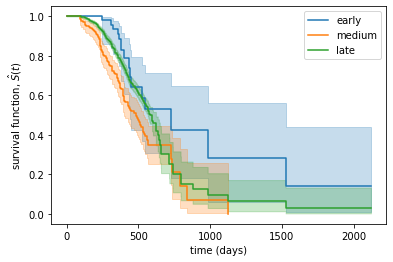

In [97]:
surv_early = survival.copy()
surv_medium = survival.copy()
surv_late = survival.copy()

surv_early.query("SubjectID == {0}".format(early_list_fin), inplace=True)
surv_medium.query("SubjectID == {0}".format(medium_list_fin), inplace=True)
surv_late.query("SubjectID == {0}".format(late_list_fin), inplace=True)

kmf = KaplanMeierFitter()
kmf.fit(surv_early["time_event"], surv_early["status"], label="early")
ax_kmf = kmf.plot()
kmf.fit(surv_medium["time_event"], surv_medium["status"], label="medium")
ax_kmf = kmf.plot(ax=ax_kmf)
kmf.fit(surv_late["time_event"], surv_late["status"], label="late")
ax_kmf = kmf.plot(ax=ax_kmf)

ax_kmf.set_xlabel('time (days)')
ax_kmf.set_ylabel('survival function, $\hat{S}(t)$')
ax_kmf

In [98]:
from lifelines.statistics import logrank_test
logrank_test(surv_early["time_event"], surv_late["time_event"], surv_early["status"], surv_late["status"]).p_value

0.081562951500785

In [108]:
logrank_test(surv_early["time_event"], surv_medium["time_event"], surv_early["status"], surv_medium["status"]).p_value

0.002567400429720269

## Cox regression - effect of delayed gastrostomy

###Preprocessing data

In [100]:
feature_surv = pd.merge(feature, survival, on = 'SubjectID')
feature_surv = feature_surv.drop(columns='Unnamed: 0')
feature_surv

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,4.000000,3.000000,4.000000,3.000000,1.900000,3.000000,2.600000,2.000000,1.200000,3.200000,8.000000,13.700000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,274,0
1,348.0,52.0,0.0,-302.0,-501.0,0.0,199.0,-0.418109,97.421687,30.250000,4.000000,4.000000,4.000000,3.500000,2.000000,2.250000,3.500000,2.000000,1.000000,4.000000,8.000000,14.250000,-0.016393,0.000000,0.000000,0.000000,0.016393,0.000000,-0.016393,0.016393,0.000000,0.000000,0.000000,0.000000,-0.016393,401,0
2,533.0,65.0,0.0,-44.0,-1023.0,1.0,979.0,-0.583333,73.500000,28.666667,1.000000,1.333333,2.000000,4.000000,4.000000,3.333333,4.000000,3.333333,2.666667,3.000000,3.000000,21.333333,-0.010989,-0.010989,-0.010989,0.000000,0.000000,0.000000,-0.010989,0.010989,0.010989,0.010989,0.000000,-0.010989,0.010989,378,0
3,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,3.000000,2.833333,2.666667,3.166667,3.750000,3.166667,4.000000,4.000000,2.833333,2.833333,5.666667,20.916667,-0.021978,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,250,1
4,902.0,77.0,0.0,-49.0,-514.0,0.0,465.0,-0.041707,89.600000,32.250000,4.000000,3.750000,3.250000,4.000000,4.000000,2.750000,4.000000,2.500000,1.000000,3.000000,7.250000,18.250000,-0.035714,0.000000,0.000000,0.011905,0.000000,0.000000,-0.023810,0.023810,-0.011905,0.000000,-0.011905,0.011905,-0.035714,154,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,999761.0,62.0,1.0,-201.0,-717.0,0.0,516.0,-0.276491,70.168332,28.728766,3.269068,3.204172,3.363836,2.913782,2.626244,2.396330,2.952348,2.611772,1.842263,3.593018,6.628258,15.378400,-0.065272,0.023548,-0.045048,0.046242,-0.034908,-0.036826,-0.023184,0.007134,0.003107,0.002035,0.033081,0.069433,-0.123884,707,0
4042,999823.0,55.0,1.0,-84.0,-492.0,0.0,408.0,-0.025981,100.800000,35.250000,2.750000,3.000000,2.750000,4.000000,3.750000,3.000000,4.000000,4.000000,4.000000,4.000000,5.500000,22.750000,-0.024390,-0.012195,0.000000,-0.012195,0.000000,0.000000,0.000000,0.012195,0.000000,0.000000,0.000000,-0.024390,0.000000,184,0
4043,999880.0,51.0,1.0,-2105.0,-2865.0,0.0,760.0,-0.079112,50.250000,24.200000,4.000000,4.000000,4.000000,2.000000,1.000000,0.400000,2.800000,2.000000,0.000000,4.000000,8.000000,8.200000,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.028571,0.000000,0.000000,0.000000,0.000000,0.014286,266,0
4044,999929.0,56.0,1.0,-107.0,-411.0,0.0,304.0,0.288855,65.740601,28.811225,3.057780,3.227749,3.522808,2.987901,2.562066,2.399382,2.975168,2.625112,1.833925,3.589713,6.587373,15.357077,-0.019082,-0.004429,-0.003651,-0.000554,0.002776,-0.008762,0.007679,-0.023168,-0.006188,-0.015027,-0.004572,-0.005919,-0.004478,168,0


In [101]:
feature_surv_early = feature_surv.copy()
feature_surv_early.query("SubjectID == {0}".format(early_list_fin), inplace=True)
feature_surv_early['delayed_gas'] = 0 
feature_surv_early

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
162,36997.0,64.0,0.0,-433.0,-1251.0,0.0,818.0,-0.142857,87.500000,30.000000,4.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,0.00,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,377,0,0
274,62767.0,51.0,0.0,-34.0,-865.0,0.0,831.0,-0.050493,64.000000,32.500000,4.000000,3.500000,3.500000,4.000000,4.000000,3.000000,3.000000,2.000000,2.50,3.000000,7.500000,18.500000,-0.052632,0.000000,-0.017544,-0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017544,0.000000,-0.017544,-0.017544,722,0,0
327,75334.0,38.0,0.0,-520.0,-582.0,0.0,62.0,-0.148148,55.000000,23.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.00,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,548,1,0
423,103126.0,26.0,1.0,-527.0,-770.0,1.0,243.0,0.064103,70.666667,27.500000,2.000000,3.500000,3.500000,3.000000,2.000000,1.500000,4.000000,2.500000,1.50,4.000000,5.500000,14.500000,-0.047619,0.000000,0.015873,-0.015873,0.000000,0.000000,-0.015873,0.047619,-0.015873,-0.015873,0.000000,-0.015873,-0.047619,399,0,0
461,109303.0,58.0,1.0,-296.0,-545.0,0.0,249.0,-0.071429,67.500000,23.000000,4.000000,4.000000,4.000000,0.000000,1.000000,1.000000,2.000000,3.000000,1.00,3.000000,8.000000,8.000000,-0.027576,-0.001628,0.000080,-0.001296,-0.008067,-0.006941,-0.010815,0.031874,-0.001677,0.001204,-0.008233,-0.002849,-0.016591,137,0,0
469,111495.0,67.0,1.0,-102.0,-367.0,0.0,265.0,0.144771,83.000000,31.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,3.000000,2.000000,1.00,4.000000,8.000000,15.000000,-0.022222,0.000000,0.000000,0.000000,0.000000,-0.022222,0.000000,0.011111,0.000000,0.000000,0.000000,0.000000,-0.022222,392,0,0
538,123794.0,76.0,0.0,-164.0,-551.0,0.0,387.0,-0.101283,78.250000,31.000000,3.333333,4.000000,2.333333,3.000000,4.000000,4.000000,2.000000,3.333333,1.00,4.000000,5.666667,17.333333,0.000000,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,-0.035714,-0.017857,0.000000,0.000000,0.017857,-0.017857,122,0,0
624,147061.0,37.0,0.0,-95.0,-569.0,0.0,474.0,-0.070337,66.000000,25.000000,4.000000,4.000000,4.000000,4.000000,3.000000,2.000000,1.000000,0.000000,0.00,3.000000,8.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,381,0,0
713,169905.0,57.0,1.0,-1116.0,-1296.0,0.0,180.0,0.053305,107.666667,33.500000,4.000000,4.000000,4.000000,1.500000,2.000000,2.000000,4.000000,4.000000,4.00,4.000000,8.000000,17.500000,-0.020408,0.000000,0.000000,0.000000,-0.020408,0.000000,0.000000,0.040816,0.000000,0.000000,0.000000,0.000000,-0.020408,378,0,0
732,173029.0,60.0,1.0,-153.0,-1248.0,0.0,1095.0,0.060642,106.333333,36.000000,4.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00,4.000000,8.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,378,0,0


In [102]:
feature_surv_late = feature_surv.copy()
feature_surv_late.query("SubjectID == {0}".format(late_list_fin), inplace=True)
feature_surv_late['delayed_gas'] = 1
feature_surv_late

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
0,329.0,38.0,0.0,-1068.0,-1706.0,0.0,638.0,0.048171,101.250000,27.900000,4.0,3.000000,4.000000,3.000000,1.900000,3.000000,2.600000,2.0,1.200000,3.200000,8.000000,13.700000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.013889,0.000000,0.000000,0.041667,274,0,1
3,708.0,46.0,1.0,-986.0,-1070.0,1.0,84.0,-0.061928,51.000000,32.250000,3.0,2.833333,2.666667,3.166667,3.750000,3.166667,4.000000,4.0,2.833333,2.833333,5.666667,20.916667,-0.021978,0.000000,-0.010989,-0.010989,0.000000,0.000000,0.010989,0.000000,0.000000,0.000000,-0.010989,-0.010989,0.010989,250,1,1
8,3971.0,55.0,0.0,-378.0,-763.0,0.0,385.0,-0.142857,86.000000,30.000000,4.0,4.000000,4.000000,4.000000,4.000000,2.000000,3.000000,1.0,0.000000,4.000000,8.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,378,0,1
15,5067.0,63.0,0.0,-84.0,-449.0,1.0,365.0,0.142857,62.000000,30.000000,2.0,3.500000,3.500000,3.500000,3.500000,3.500000,3.500000,3.0,1.000000,3.000000,5.500000,18.000000,0.285714,0.000000,0.071429,-0.071429,0.071429,0.071429,0.071429,0.000000,0.000000,0.000000,0.000000,-0.071429,0.285714,105,0,1
16,5658.0,69.0,1.0,-192.0,-284.0,0.0,92.0,-0.004942,80.000000,21.333333,4.0,4.000000,4.000000,0.000000,0.666667,0.666667,1.333333,2.0,0.666667,4.000000,8.000000,5.333333,-0.045977,0.000000,0.000000,0.000000,0.000000,-0.011494,-0.011494,0.011494,0.000000,-0.011494,0.000000,0.000000,-0.045977,353,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,994853.0,43.0,1.0,-293.0,-673.0,0.0,380.0,0.576838,76.142703,22.750000,3.0,3.750000,3.000000,2.000000,1.250000,1.000000,2.000000,2.0,0.750000,4.000000,6.000000,9.000000,-0.038462,0.000000,-0.012821,0.000000,0.000000,-0.012821,0.000000,0.012821,0.000000,-0.012821,0.000000,0.000000,-0.025641,384,0,1
4030,996808.0,53.0,1.0,-306.0,-666.0,0.0,360.0,0.418001,94.333648,27.250000,4.0,4.000000,4.000000,2.250000,1.750000,1.250000,3.000000,2.0,1.000000,4.000000,8.000000,11.250000,-0.034091,0.000000,0.000000,0.000000,-0.011364,-0.011364,-0.011364,0.022727,0.000000,0.000000,0.000000,0.000000,-0.034091,461,0,1
4031,996981.0,53.0,1.0,-187.0,-887.0,0.0,700.0,-0.029430,91.000000,29.000000,4.0,4.000000,4.000000,4.000000,3.666667,3.000000,2.333333,2.0,1.000000,1.000000,8.000000,16.000000,-0.033898,0.000000,0.000000,0.000000,0.000000,-0.016949,0.000000,-0.016949,0.000000,0.000000,0.000000,0.000000,-0.033898,247,0,1
4033,997276.0,32.0,1.0,-305.0,-699.0,1.0,394.0,-0.154964,51.000000,35.300000,2.0,3.000000,4.000000,3.400000,3.500000,3.700000,4.000000,4.0,4.000000,3.700000,6.000000,22.600000,0.000000,0.000000,0.000000,0.000000,-0.042857,0.014286,0.014286,0.000000,0.000000,0.000000,0.014286,0.000000,-0.014286,273,0,1


In [103]:
X = pd.concat([feature_surv_early, feature_surv_late])
X

,SubjectID,Age,Gender,diag_delta,onset_delta,onset_site,diag_minus_onset,fvc_slope,fvc_mean,mean_alsfrs_total,mean_Q1_Speech,mean_Q2_Salivation,mean_Q3_Swallowing,mean_Q4_Handwriting,mean_Q5_Cutting,mean_Q6_Dressing_and_Hygiene,mean_Q7_Turning_in_Bed,mean_Q8_Walking,mean_Q9_Climbing_Stairs,mean_Q10_Respiratory,mean_Bulbar,mean_motor,slope_alsfrs_tot,slope_Q1_Speech,slope_Q2_Salivation,slope_Q3_Swallowing,slope_Q4_Handwriting,slope_Q5_Cutting,slope_Q6_Dressing_and_Hygiene,slope_Q7_Turning_in_Bed,slope_Q8_Walking,slope_Q9_Climbing_Stairs,slope_Q10_Respiratory,slope_Bulbar,slope_motor,time_event,status,delayed_gas
162,36997.0,64.0,0.0,-433.0,-1251.0,0.0,818.0,-0.142857,87.500000,30.00,4.0,4.00,4.0,4.00,4.000000,2.00,2.000000,2.0,0.00,4.0,8.0,14.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,377,0,0
274,62767.0,51.0,0.0,-34.0,-865.0,0.0,831.0,-0.050493,64.000000,32.50,4.0,3.50,3.5,4.00,4.000000,3.00,3.000000,2.0,2.50,3.0,7.5,18.50,-0.052632,0.000000,-0.017544,-0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,-0.017544,0.000000,-0.017544,-0.017544,722,0,0
327,75334.0,38.0,0.0,-520.0,-582.0,0.0,62.0,-0.148148,55.000000,23.00,4.0,4.00,4.0,3.00,1.000000,1.00,1.000000,1.0,0.00,4.0,8.0,7.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,548,1,0
423,103126.0,26.0,1.0,-527.0,-770.0,1.0,243.0,0.064103,70.666667,27.50,2.0,3.50,3.5,3.00,2.000000,1.50,4.000000,2.5,1.50,4.0,5.5,14.50,-0.047619,0.000000,0.015873,-0.015873,0.000000,0.000000,-0.015873,0.047619,-0.015873,-0.015873,0.000000,-0.015873,-0.047619,399,0,0
461,109303.0,58.0,1.0,-296.0,-545.0,0.0,249.0,-0.071429,67.500000,23.00,4.0,4.00,4.0,0.00,1.000000,1.00,2.000000,3.0,1.00,3.0,8.0,8.00,-0.027576,-0.001628,0.000080,-0.001296,-0.008067,-0.006941,-0.010815,0.031874,-0.001677,0.001204,-0.008233,-0.002849,-0.016591,137,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,994853.0,43.0,1.0,-293.0,-673.0,0.0,380.0,0.576838,76.142703,22.75,3.0,3.75,3.0,2.00,1.250000,1.00,2.000000,2.0,0.75,4.0,6.0,9.00,-0.038462,0.000000,-0.012821,0.000000,0.000000,-0.012821,0.000000,0.012821,0.000000,-0.012821,0.000000,0.000000,-0.025641,384,0,1
4030,996808.0,53.0,1.0,-306.0,-666.0,0.0,360.0,0.418001,94.333648,27.25,4.0,4.00,4.0,2.25,1.750000,1.25,3.000000,2.0,1.00,4.0,8.0,11.25,-0.034091,0.000000,0.000000,0.000000,-0.011364,-0.011364,-0.011364,0.022727,0.000000,0.000000,0.000000,0.000000,-0.034091,461,0,1
4031,996981.0,53.0,1.0,-187.0,-887.0,0.0,700.0,-0.029430,91.000000,29.00,4.0,4.00,4.0,4.00,3.666667,3.00,2.333333,2.0,1.00,1.0,8.0,16.00,-0.033898,0.000000,0.000000,0.000000,0.000000,-0.016949,0.000000,-0.016949,0.000000,0.000000,0.000000,0.000000,-0.033898,247,0,1
4033,997276.0,32.0,1.0,-305.0,-699.0,1.0,394.0,-0.154964,51.000000,35.30,2.0,3.00,4.0,3.40,3.500000,3.70,4.000000,4.0,4.00,3.7,6.0,22.60,0.000000,0.000000,0.000000,0.000000,-0.042857,0.014286,0.014286,0.000000,0.000000,0.000000,0.014286,0.000000,-0.014286,273,0,1


In [104]:
X = X[['Age', 'Gender', 'onset_site', 'onset_delta',
       'diag_minus_onset', 'slope_alsfrs_tot',
       'fvc_slope', 'fvc_mean',  'mean_Q10_Respiratory',
       'mean_Bulbar', 'mean_motor', 'slope_Q1_Speech', 'slope_Q2_Salivation',
       'slope_Q3_Swallowing', 'slope_Q4_Handwriting', 'slope_Q5_Cutting',
       'slope_Q6_Dressing_and_Hygiene', 'slope_Q7_Turning_in_Bed',
       'slope_Q8_Walking', 'slope_Q9_Climbing_Stairs', 'slope_Q10_Respiratory','delayed_gas','time_event','status']]

In [105]:
from lifelines import CoxPHFitter

In [106]:
cph = CoxPHFitter(penalizer=0.01)
cph.fit(X, 'time_event', event_col='status')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 957 total observations, 716 right-censored observations>
             duration col = 'time_event'
                event col = 'status'
                penalizer = 0.01
                 l1 ratio = 0.0
      baseline estimation = breslow
   number of observations = 957
number of events observed = 241
   partial log-likelihood = -1332.42
         time fit was run = 2021-05-20 18:15:20 UTC

---
                                coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                             
Age                             0.04       1.04       0.01             0.03             0.06                 1.03                 1.06
Gender                          0.17       1.18       0.14            -0.10             0.44                 0.90                 1.56
onset_site                     -0.34       0.71       0.26            -0.84             0.17                 0.43                 1.18
onset_delta                     0.00       1.00       0.00             0.00             0.00                 1.00                 1.00
diag_minus_onset                0.00       1.00       0.00            -0.00             0.00                 1.00                 1.00
slope_alsfrs_tot               -2.18       0.11       2.46            -7.00             2.63                 0.00                13.94
fvc_slope                      -0.28       0.75       0.23            -0.74             0.17                 0.48                 1.19
fvc_mean                       -0.01       0.99       0.00            -0.02            -0.01                 0.98                 0.99
mean_Q10_Respiratory           -0.04       0.96       0.11            -0.26             0.18                 0.77                 1.19
mean_Bulbar                    -0.10       0.91       0.08            -0.25             0.05                 0.78                 1.06
mean_motor                     -0.08       0.93       0.01            -0.11            -0.05                 0.90                 0.95
slope_Q1_Speech                -2.36       0.09       5.69           -13.50             8.78                 0.00              6512.08
slope_Q2_Salivation           -12.42       0.00       5.92           -24.02            -0.82                 0.00                 0.44
slope_Q3_Swallowing             7.01    1102.50       5.35            -3.48            17.49                 0.03             3.93e+07
slope_Q4_Handwriting            7.55    1892.20       4.82            -1.90            16.99                 0.15             2.40e+07
slope_Q5_Cutting               -5.54       0.00       4.07           -13.52             2.44                 0.00                11.46
slope_Q6_Dressing_and_Hygiene  -4.13       0.02       5.27           -14.46             6.20                 0.00               494.51
slope_Q7_Turning_in_Bed        -4.65       0.01       2.66            -9.86             0.56                 0.00                 1.75
slope_Q8_Walking              -11.80       0.00       6.30           -24.15             0.56                 0.00                 1.75
slope_Q9_Climbing_Stairs        7.41    1660.65       4.45            -1.31            16.14                 0.27             1.02e+07
slope_Q10_Respiratory          -4.22       0.01       5.29           -14.58             6.15                 0.00               467.42
delayed_gas                     0.38       1.47       0.28            -0.16             0.92                 0.85                 2.51

                                  z      p   -log2(p)
covariate                                            
Age                            7.00 <0.005      38.48
Gender                         1.21   0.23       2.15
onset_site                    -1.31   0.19       2.39
onset_delta                    3.57 <0.005      11.45
diag_

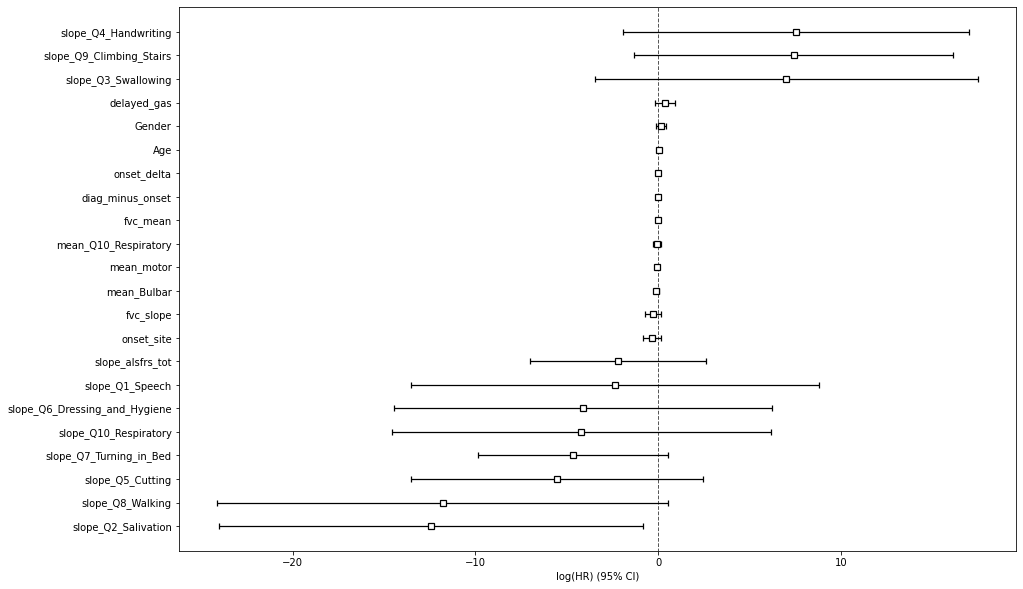

In [107]:
plt.figure(figsize=(15,10))
cph.plot()
#HR >1, 즉 log(HR)>0 이면 사망 위험 증가를 뜻함